In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
import pandas as pd

In [12]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config) 

In [13]:
# 读取数据
path = 'D:/tx/regress_data1.csv'
data = pd.read_csv(path)
X_data = data.iloc[:, :-1]  # 取出所有行，去掉最后一列， 未标准化
y_data = data.iloc[:, -1:]  # 取出所有行，最后一列

In [14]:
X_data_normalized = (X_data - X_data.min()) / (X_data.max()-X_data.min())

In [15]:
# 插入截距项
X_data_normalized.insert(0, 'Ones', 1)

In [16]:
# 将数据转换为NumPy数组
X = X_data_normalized.values
y = y_data.values

In [17]:
# 使用最小二乘法求解线性回归模型
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [18]:
# 打印模型参数
print("模型参数 W:")
print(W)

模型参数 W:
[[ 2.10147995]
 [20.49166518]]


In [19]:
# 绘制数据和拟合线
x = np.linspace(X_data_normalized['人口'].min(), X_data_normalized['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

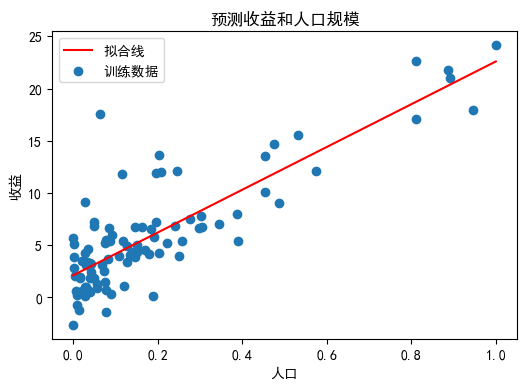

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(x, f, 'r', label='拟合线')
plt.scatter(X_data_normalized['人口'], data['收益'], label='训练数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.title('预测收益和人口规模')
plt.legend()
plt.show()